In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 20 # number of players
priors = {'Beta', 'Normal', 'Bernoulli'} # different priors
action_space = {1, 0} # 1: cooperate, 0: defect
# payoff is always 1 if at least k person cooperates, otherwise r (-\infty, 1)
k = 5
r = 0


In [4]:
def get_player_types(num_player, prior_type, *args):
    if prior_type == 'Beta':
        return np.random.beta(*args, size=num_player) # cost
    elif prior_type == 'Normal':
        # TODO
        raise NotImplementedError
        return np.random.normal(*args, size=num_player)
    elif prior_type == 'Bernoulli':
        return (np.random.binomial(1, *args, size=num_player) * 0.6 + 0.2) # cost = 0.2 or 0.8

In [5]:
def get_payoffs(player_types, actions, k):
    if np.sum(actions == 1) < k:
        return np.ones(len(player_types)) * r
    else:
        payoffs = np.zeros(len(player_types))
        payoffs[actions == 1] = 1 - player_types[actions == 1]
        payoffs[actions == 0] = 1
        return payoffs

def get_payoff(player_type, index, actions, k):
    # return payoff of one player
    if np.sum(actions == 1) < k:
        return r
    else:
        if actions[index] == 0:
            return 1
        else:
            return 1 - player_type

In [6]:
def get_actions(player_types, k, prev_actions=None, strategy='stochastic'):
    # return a mixed strategy based on previous actions
    # TODO implement the equilibrium strategy in paper
    
    if prev_actions is None:
        return np.random.binomial(1, 1 - player_types, size=len(player_types)) # low cost player has a higher chance volunteering
    else:
        action_probs = np.zeros((len(player_types), 2))
        payoffs = get_payoffs(player_types, prev_actions, k)
        mask = np.array([[1-i, i] for i in prev_actions]) == 1
        action_probs[mask] = payoffs

        # test the other action
        for i in range(len(player_types)):
            new_action = 1 - prev_actions[i]
            action_probs[i, new_action] = get_payoff(player_types[i], i, np.concatenate((prev_actions[:i], [new_action], prev_actions[i+1:])), k)

        # avoid division by 0
        action_probs[action_probs == 0] = 1e-10
        # normalize the actions
        action_probs = action_probs / np.sum(action_probs, axis=1, keepdims=True)

        if strategy == 'stochastic':
            actions = np.array([np.random.choice(2, p=probs) for probs in action_probs])
        elif strategy == 'deterministic':
            actions = np.argmax(action_probs, axis=1)
        return actions

In [7]:
a = np.arange(8).reshape((4, 2)) - 4
print(a)
b = a + np.min(a, axis=1, keepdims=True)
b

[[-4 -3]
 [-2 -1]
 [ 0  1]
 [ 2  3]]


array([[-8, -7],
       [-4, -3],
       [ 0,  1],
       [ 4,  5]])

player types: [0.18188829 0.68968767 0.91807625 0.52554479 0.13298384 0.21488882
 0.32790728 0.19107003 0.3283569  0.29093663 0.60649793 0.52553614
 0.81019542 0.8367613  0.73961115 0.58717913 0.80788964 0.13982352
 0.11952703 0.46511727]
1 people need to cooperate to reach the objective
played 200 rounds
objective reached 200 times


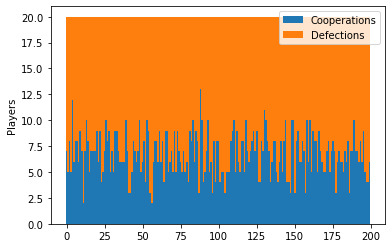

2 people need to cooperate to reach the objective
played 200 rounds
objective reached 198 times


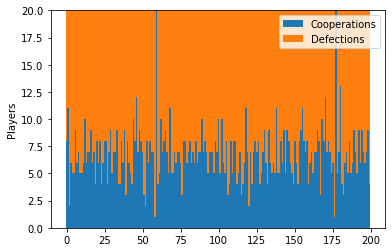

3 people need to cooperate to reach the objective
played 200 rounds
objective reached 198 times


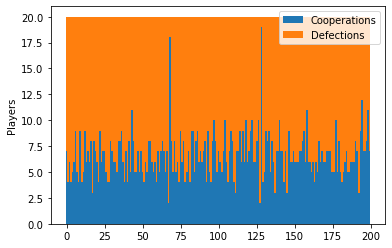

4 people need to cooperate to reach the objective
played 200 rounds
objective reached 190 times


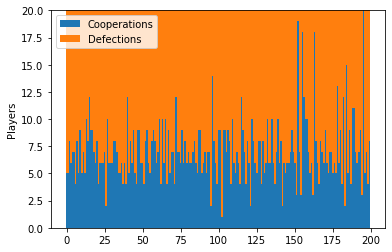

5 people need to cooperate to reach the objective
played 200 rounds
objective reached 178 times


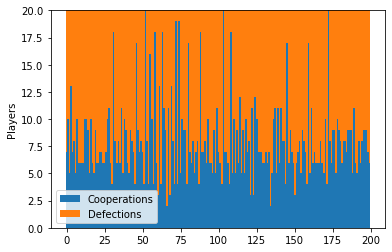

6 people need to cooperate to reach the objective
played 200 rounds
objective reached 160 times


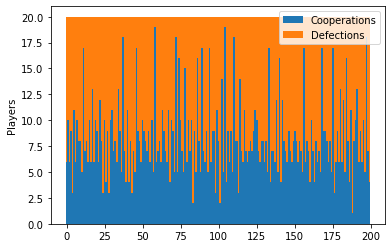

7 people need to cooperate to reach the objective
played 200 rounds
objective reached 137 times


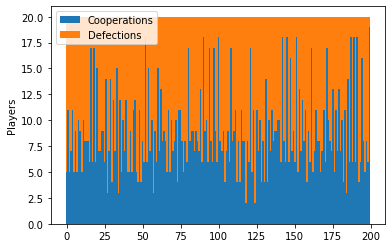

8 people need to cooperate to reach the objective
played 200 rounds
objective reached 125 times


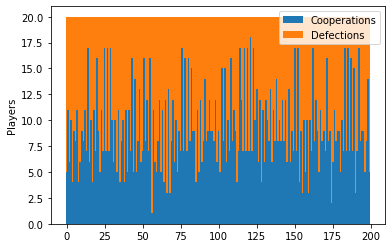

9 people need to cooperate to reach the objective
played 200 rounds
objective reached 109 times


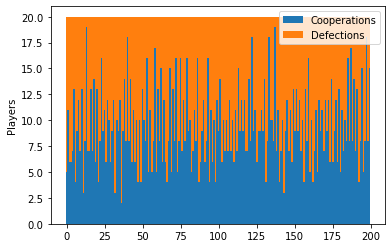

10 people need to cooperate to reach the objective
played 200 rounds
objective reached 94 times


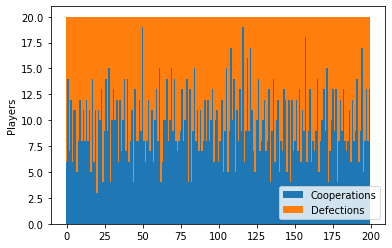

11 people need to cooperate to reach the objective
played 200 rounds
objective reached 84 times


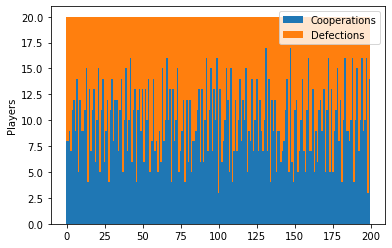

12 people need to cooperate to reach the objective
played 200 rounds
objective reached 59 times


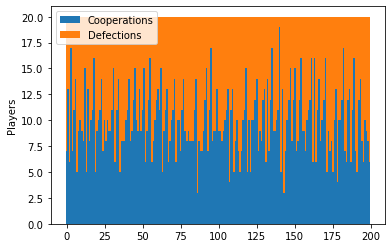

13 people need to cooperate to reach the objective
played 200 rounds
objective reached 47 times


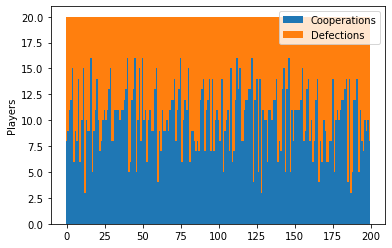

14 people need to cooperate to reach the objective
played 200 rounds
objective reached 28 times


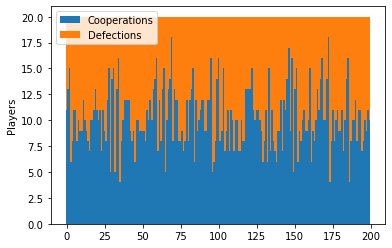

15 people need to cooperate to reach the objective
played 200 rounds
objective reached 6 times


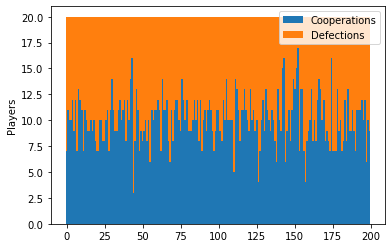

16 people need to cooperate to reach the objective
played 200 rounds
objective reached 6 times


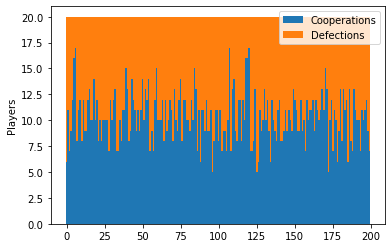

17 people need to cooperate to reach the objective
played 200 rounds
objective reached 0 times


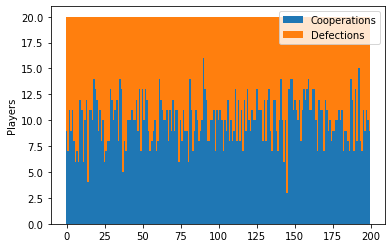

18 people need to cooperate to reach the objective
played 200 rounds
objective reached 0 times


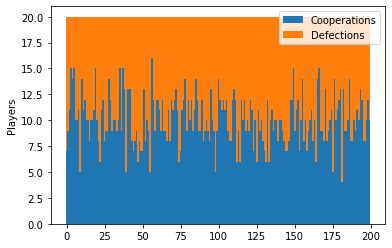

19 people need to cooperate to reach the objective
played 200 rounds
objective reached 0 times


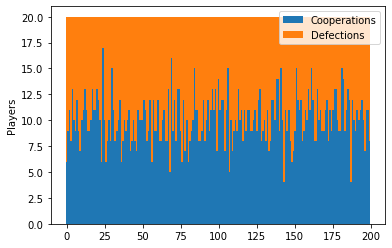

20 people need to cooperate to reach the objective
played 200 rounds
objective reached 200 times


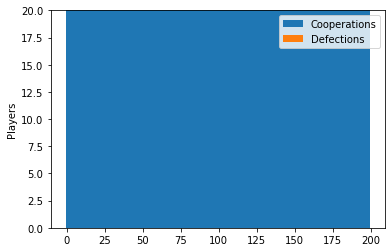

TypeError: 'list' object is not callable

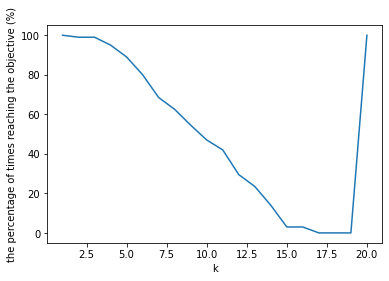

In [74]:
rounds = 200
player_types = get_player_types(n, 'Beta', 1, 1) # uniform prior
print('player types:', player_types)

n = 20 # number of players
# payoff is always 1 if at least k person cooperates, otherwise r
k = 5
r = 0

objectives = []
for k in range(1,21):
    prev_actions = np.ones(n).astype(int) # None
    objective_reached = 0
    
    cooperations = []
    defections = []
    for i in range(rounds):
        # print('round', i, 'of the game')
        actions = get_actions(player_types, k, prev_actions, strategy='stochastic')
        # print('actions', actions)
        # print('number of people who cooperated', np.sum(actions == 1))
        cooperations.append(np.sum(actions == 1))
        # print('number of people who defected', np.sum(actions == 0))
        defections.append(np.sum(actions == 0))
        payoffs = get_payoffs(player_types, actions, k)
        # print('payoffs', payoffs)
        prev_actions = actions
        if np.sum(payoffs) > 0:
            objective_reached += 1

    print(k, 'people need to cooperate to reach the objective')
    print('played', rounds, 'rounds')
    print('objective reached', objective_reached, 'times')
    objectives.append(objective_reached/rounds*100)

    fig, ax = plt.subplots()

    ax.bar(np.arange(rounds), cooperations, 1, label='Cooperations')
    ax.bar(np.arange(rounds), defections, 1, bottom=cooperations,
        label='Defections')

    ax.set_ylabel('Players')
    ax.legend()

    plt.show()
    plt.close()

plt.plot(list(range(1,21)), objectives)
plt.xlabel('k')
plt.ylabel('the percentage of times reaching the objective (%)')
plt.xticks(list(range(1,21)))
plt.show()


player types: [0.11018401 0.92559543 0.12655824 0.70374804 0.4490485  0.32822107
 0.85283697 0.01620776 0.82606525 0.84089013 0.81584072 0.85357884
 0.80494708 0.86468742 0.03595697 0.84245954 0.94201142 0.54662357
 0.50279179 0.19622961]


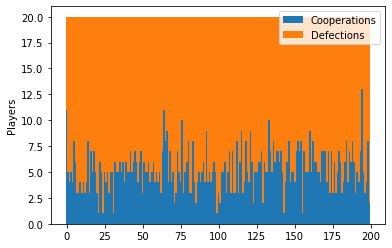

In [12]:
rounds = 200
player_types = get_player_types(n, 'Beta', 1, 1) # uniform prior
print('player types:', player_types)

prev_actions = None
objective_reached = 0
cooperations = []
defections = []
for i in range(rounds):
    # print('round', i, 'of the game')
    actions = get_actions(player_types, 1, prev_actions)
    # print('actions', actions)
    # print('number of people who cooperated', np.sum(actions == 1))
    cooperations.append(np.sum(actions == 1))
    # print('number of people who defected', np.sum(actions == 0))
    defections.append(np.sum(actions == 0))
    payoffs = get_payoffs(player_types, actions, 1)
    # print('payoffs', payoffs)
    prev_actions = actions
    if np.sum(payoffs) > 0:
        objective_reached += 1
    
fig, ax = plt.subplots()

ax.bar(np.arange(rounds), cooperations, 1, label='Cooperations')
ax.bar(np.arange(rounds), defections, 1, bottom=cooperations,
       label='Defections')

ax.set_ylabel('Players')
ax.legend()

plt.show()

# print('played', rounds, 'rounds')
# print('objective reached', objective_reached, 'times')

player types: [0.32781228 0.26505706 0.57415333 0.68567992 0.6124516  0.72144559
 0.19385817 0.85031247 0.3425894  0.50369984 0.24494964 0.59405473
 0.92424977 0.57328719 0.24490754 0.35813757 0.87878029 0.05533425
 0.83330601 0.88629341]


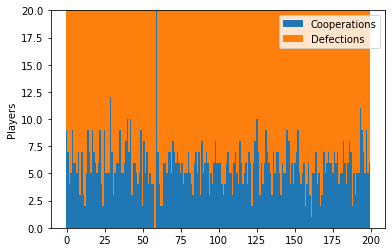

In [13]:
rounds = 200
player_types = get_player_types(n, 'Beta', 2, 2) # uniform prior
print('player types:', player_types)

prev_actions = None
objective_reached = 0
cooperations = []
defections = []
for i in range(rounds):
    # print('round', i, 'of the game')
    actions = get_actions(player_types, 1, prev_actions)
    # print('actions', actions)
    # print('number of people who cooperated', np.sum(actions == 1))
    cooperations.append(np.sum(actions == 1))
    # print('number of people who defected', np.sum(actions == 0))
    defections.append(np.sum(actions == 0))
    payoffs = get_payoffs(player_types, actions, 1)
    # print('payoffs', payoffs)
    prev_actions = actions
    if np.sum(payoffs) > 0:
        objective_reached += 1
    
fig, ax = plt.subplots()

ax.bar(np.arange(rounds), cooperations, 1, label='Cooperations')
ax.bar(np.arange(rounds), defections, 1, bottom=cooperations,
       label='Defections')

ax.set_ylabel('Players')
ax.legend()

plt.show()

# print('played', rounds, 'rounds')
# print('objective reached', objective_reached, 'times')

In [25]:
def get_equilibrium_actions(player_types, prev_actions_freq):
    # prev_actions_freq is a list of frequencies of the previous volunteer actions
    p = np.prod(1 - prev_actions_freq)
    actions = player_types < p/(1-prev_actions_freq+1e-10)
    # for i in range(len(player_types)):
    #     actions[i] = int(player_types[i] < np.prod(1 - prev_actions_freq[:i]) * np.prod(1 - prev_actions_freq[i+1:]))
    return actions.astype(int)

player types: [0.52260252 0.65120164 0.79043242 0.97357744 0.81455945 0.62588558
 0.82990046 0.79652753 0.89863052 0.69227425 0.85292162 0.7180445
 0.96114524 0.96184406 0.85923892 0.95831896 0.78403871 0.61155566
 0.89723123 0.99830431]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333]
[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
 0.16

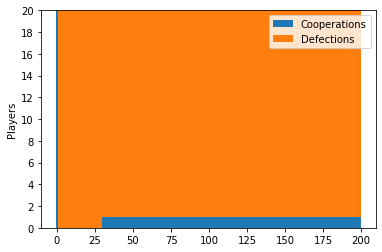

In [57]:
n = 20
rounds = 200
# player_types = abs(get_player_types(n, 'Beta', 1, 1)) # uniform prior
player_types = abs(get_player_types(n, 'Beta', 5, 1))
print('player types:', player_types)
# print('strongest player:', np.argmin(player_types))

prev_actions_freq = np.zeros(n) 
# prev_actions_freq = np.random.binomial(1, 1 - player_types, size=len(player_types))
# prev_actions_freq = 1 - player_types
objective_reached = 0
cooperations = []
defections = []
for i in range(rounds):
    # print('round', i, 'of the game')
    actions = get_equilibrium_actions(player_types, prev_actions_freq)
    # print('cooperate player(s):', np.where(actions == 1)[0])
    # print('actions', actions)
    # print('number of people who cooperated', np.sum(actions == 1))
    cooperations.append(np.sum(actions == 1))
    # print('number of people who defected', np.sum(actions == 0))
    defections.append(np.sum(actions == 0))
    payoffs = get_payoffs(player_types, actions, 1)
    # print('payoffs', payoffs)
    prev_actions_freq = prev_actions_freq * i / (i+1) + (actions / (i+1))
    print(prev_actions_freq)
    if np.sum(payoffs) > 0:
        objective_reached += 1
    
fig, ax = plt.subplots()

ax.bar(np.arange(rounds), cooperations, 1, label='Cooperations')
ax.bar(np.arange(rounds), defections, 1, bottom=cooperations,
       label='Defections')

ax.set_ylabel('Players')
ax.legend()
plt.yticks(np.arange(0, n+1, 2))
plt.show()

# print('played', rounds, 'rounds')
# print('objective reached', objective_reached, 'times')